In [1]:
# Dependencies
import pandas as pd
import json
import os
import requests
from pandas import json_normalize
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
import csv
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib.dates as mdates

In [5]:
oil_file = "oil_price.csv"
oil_price_df = pd.read_csv(oil_file)
oil_price_df['Date'] = pd.to_datetime(oil_price_df['Date'],errors="coerce")

oil_price_df.sort_values(by='Date')
# oil_price_df1= oil_price_df.rename(columns={"date":"Date", "value": "oil_price"})
# count = oil_price_df['date'].value_counts()
# count
oil_price_df

,Date,oil_price
0,2009-06-29,71.470
1,2009-06-30,69.820
2,2009-07-01,69.320
3,2009-07-02,66.680
4,2009-07-06,64.060
...,...,...
3269,2022-06-20,108.618
3270,2022-06-21,109.746
3271,2022-06-22,106.190
3272,2022-06-23,104.270


In [24]:
gas_file = "Weekly_Gasoline_Prices.csv"
gas_price_df = pd.read_csv(gas_file)
gas_price_df['Date'] = pd.to_datetime(gas_price_df['Date'],errors="coerce")
gas_price_df = gas_price_df.loc[gas_price_df["Date"]>"2008-06-01", ["Date", "Gasoline_Prices_per_Gallon"]]

gas_price_df.sort_values(by='Date')
# oil_price_df1= oil_price_df.rename(columns={"date":"Date", "value": "oil_price"})
# count = oil_price_df['date'].value_counts()
# count
gas_price_df

,Date,Gasoline_Prices_per_Gallon
0,2022-07-11,4.754
1,2022-07-04,4.879
2,2022-06-27,4.979
3,2022-06-20,5.066
4,2022-06-13,5.107
...,...,...
732,2008-06-30,4.146
733,2008-06-23,4.131
734,2008-06-16,4.134
735,2008-06-09,4.090


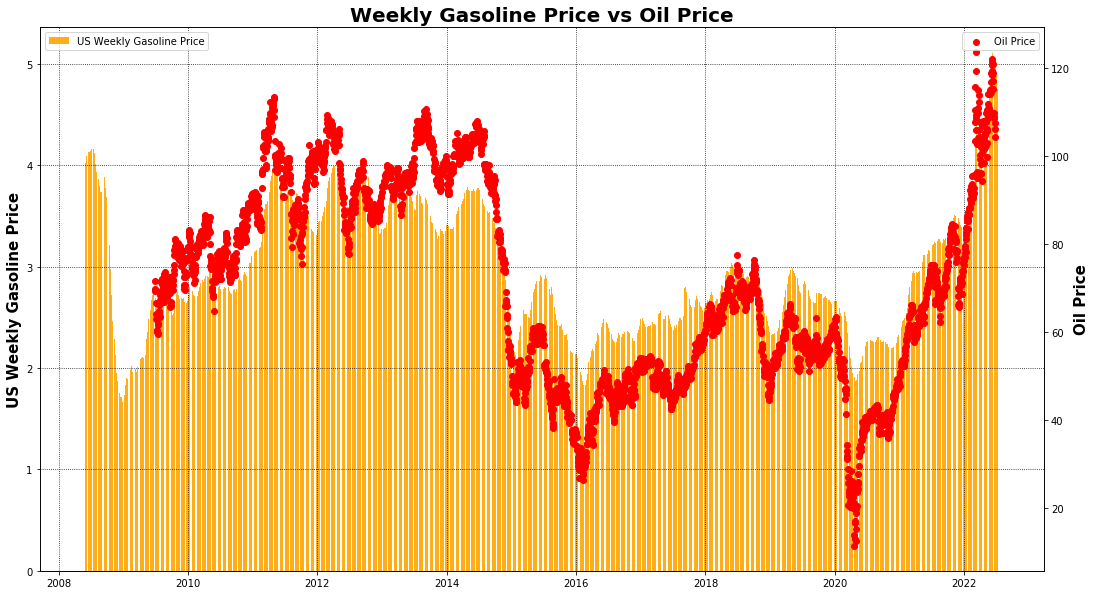

<Figure size 1080x576 with 0 Axes>

In [35]:
fig, ax1 = plt.subplots()
ax1.set_title("Weekly Gasoline Price vs Oil Price", fontweight='bold', fontsize = '20')

ax1.bar(gas_price_df['Date'], gas_price_df['Gasoline_Prices_per_Gallon'],color='orange', alpha = 0.9, width = 5, label = 'US Weekly Gasoline Price')

# ax1.set_ylim(-25, 50)
ax1.set_ylabel('US Weekly Gasoline Price', fontweight='bold', fontsize = '15')
ax1.grid(True, color = 'k', linestyle= ":")
ax1.legend(loc=2)

ax2 = ax1.twinx()
ax2.scatter(oil_price_df['Date'], oil_price_df['oil_price'],marker='o', color='red', label = 'Oil Price')
ax2.set_ylabel('Oil Price', fontweight='bold', fontsize = '15')
plt.xticks(rotation = 45)
# ax2.set_ylim(-50, 150)

plt.figure(figsize=(15, 8))
rcParams['figure.figsize']= 18,10
ax2.legend(loc=1)